Select a box and press Shift+Enter to run

In [5]:
## standard imports
import matplotlib, matplotlib.pyplot as plt, PIL.Image, IPython.display as display
from ipywidgets import interact, widgets
# from IPython import display
%matplotlib inline
%autosave 0

## custom libraries
from src import *

## initialize MDP 
env = make_small_env(reward=1, lava_value=-1)
mdp = MDP(default_env['rewards'], default_env['terminal'])
vi = VI(mdp)

Autosave disabled


Let's consider the map below, a Lava World with a single goal

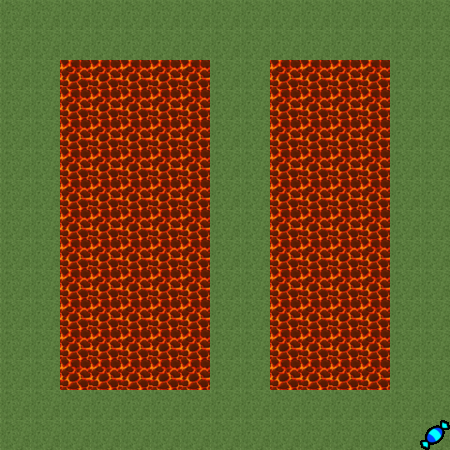

In [6]:
grid = visualize_map(default_env['rewards'], default_env['terminal'], cell_dim=30)
PIL.Image.fromarray(grid, 'RGB')

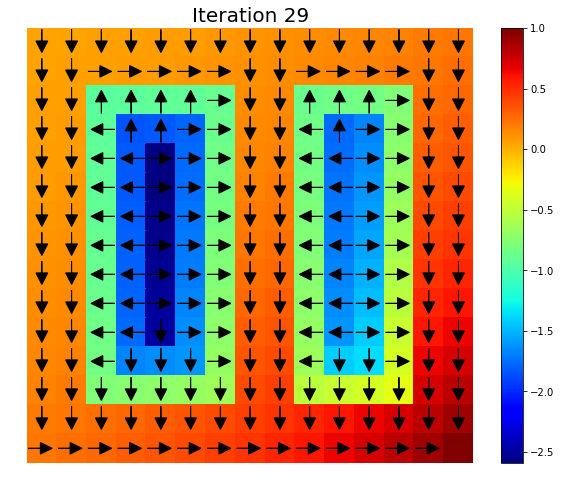

In [7]:
## Run value iteration on MDP
values, policy = vi.iterate(iterations=30, visualize=True)

Now we look at the effects of changing the rewards and discount value. We'll use the following map:

In [ ]:
rewards, terminal = make_env(0,1,-1)
small_map = visualize_map(rewards, terminal, cell_dim=30)
PIL.Image.fromarray(small_map, 'RGB')

In [ ]:
ipywidgets.interact(vi_wrapper, reward=widgets.IntSlider(min=1,max=8,step=1,value=5), lava=widgets.FloatSlider(min=-5,max=0,step=0.25,value=-3), gamma=widgets.FloatSlider(min=0.1,max=0.9,step=0.1,value=0.9));